# Building simple Nueral Network with python:
This is main workflow and functions you need. but if there is something missing or you need to add more or remove something feel free to try it.  
**JUST dont change _VanilaNN_ class methods**(their argumants only) 

## import packages:


In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
np.random.seed(37) #dont change this line
from matplotlib import pyplot as plt

## download and prepare dataset

In [5]:
# download dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



## Visualize dataset:

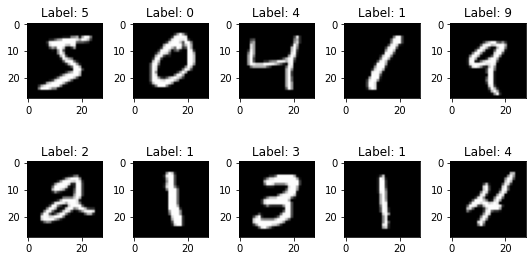

In [6]:
num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

# define model:


In [600]:
def linear(x):
    return x

def sigmoid(x):
    x =  1/(1+np.exp(-x))
    return x

def softmax(x):
    exps = np.exp(x - x.max())
    x = exps / np.sum(exps, axis=0)
    return x

def relu(x):
    for i in range(len(x)):
        if x[i] < 0 :
            x[i] = 0
    return x

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0    
    return dZ

def linear_backward(dA, Z):
    dZ = dA
    return dZ

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    dZ = dA * sig * (1 - sig) 
    
    return dZ


def cross_entropy(x, y):
    epsilon = 1e-12
    predictions = np.clip(x, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    loss = -np.sum(y*np.log(predictions+1e-9))/N 
    return loss

def BC_logits_backward(z,y):
    #put your code here 
    return dz

def CE_logits_backward(z,y):
    #put your code here 
    return dz



def initialize_parameters(parameters):
    for p in parameters:
        parameters[p] = np.random.normal(0, 0.1, parameters[p].shape ) 
    return parameters



    

def compute_cost(al, Y, loss_type):
        
    if loss_type is "cross_entropy":
        cost = cross_entropy(al, Y )
               
    elif loss_type is "mean_squared_error":
        m = Y_hat.shape[1]
        cost = 1 / m *(np.sum(al - Y))        
    elif loss_type is "binary_cross_entropy":
        m = Y_hat.shape[1]
        cost = -1 / m * (np.dot(Y.T, np.log(al)) + np.dot((1 - Y).T, np.log(1 - al)))
    
        
        
    return cost

def forward_propagation(X, layers):
    caches = {}
    A_curr = X
    
    for layer in range(layers['NumberOfLayers']):
        layer_idx = layer + 1
        A_prev = A_curr
        
        activ_function_curr = layers['activations']["Act" + str(layer_idx)]
        
        W_curr = layers['parameters']["W" + str(layer_idx)]
        b_curr = layers['parameters']["b" + str(layer_idx)]
        
        Z_curr = np.dot(W_curr.T, A_prev) + b_curr
    
        if activ_function_curr is "relu":
            activation_func = relu
        elif activ_function_curr is "sigmoid":
            activation_func = sigmoid
        elif activ_function_curr is "softmax":
            activation_func = softmax
        elif activ_function_curr is "linear":
            activation_func = linear
        else:
            raise Exception('Non-supported activation function')
        
        A_curr = activation_func(Z_curr)
        
        caches["A" + str(layer_idx)] = A_curr
        #print('train A[',layer_idx, '] is ',caches["A" + str(layer_idx)].shape )
        caches["Z" + str(layer_idx)] = Z_curr
    a = A_curr
    caches['parameters'] = layers['parameters']
    caches['NumberOfLayers'] = layers['NumberOfLayers']
    
       
    
    return a, caches


def backward_propagation(X, Y, cache, activations, loss_type):
    gradient = {}
    m = Y.shape[1]
    NumberOfLayers = cache['NumberOfLayers']
    Y_hat = cache["A" + str(NumberOfLayers)]
    cache["A0"] = X
   
    dA_prev = np.zeros(Y.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            dA_prev[i, j] = -1*(np.divide(Y[i, j], Y_hat[i, j]) - np.divide(1 - Y[i, j], 1 - Y_hat[i, j]))
    
    
    for prev_layer in range(NumberOfLayers - 1, -1 , -1):
        curr_layer = prev_layer + 1
        activ_function_curr = activations["Act" + str(curr_layer)]
        
        dA_curr = dA_prev
        
        A_prev = cache["A" + str(prev_layer)]
        Z_curr = cache["Z" + str(curr_layer)]
        W_curr = cache['parameters']["W" + str(curr_layer)]
        b_curr = cache['parameters']["b" + str(curr_layer)]
        '''
        print(curr_layer)
        print('A_prev', A_prev.shape)
        print('Z_curr', Z_curr.shape)
        print('W_curr', W_curr.shape)
        print('b_curr', b_curr.shape)
        '''
        
        
        m_prime = A_prev.shape[1]
    
        if activ_function_curr is "relu":
            backward_activation_func = relu_backward
        elif activ_function_curr is "linear":
            backward_activation_func = linear_backward
        elif activ_function_curr is "sigmoid":
            backward_activation_func = sigmoid_backward
        else:
            raise Exception('Non-supported activation function')
    
        dZ_curr = backward_activation_func(dA_curr, Z_curr)
        
        
        dW_curr = np.dot(dZ_curr, A_prev.T) / m_prime
        
        
        db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m_prime
        
        
        dA_prev = np.dot(W_curr, dZ_curr)
        
        '''
        print('dA_prev', dA_prev.shape)
        print('dZ_curr', dZ_curr.shape)
        print('dW_curr', dW_curr.shape)
        print('db_curr', db_curr.shape)
        
        '''
        
    
        
        gradient["dW" + str(curr_layer)] = dW_curr
        gradient["db" + str(curr_layer)] = db_curr
    
    
    
    
    return gradient



def make_mini_batches(X, batch_size):
    minibatches = []
    P = np.random.permutation(X.shape[1])
    if X.shape[1] < batch_size:
        return P
    else:
        index = 0
        while index <= X.shape[1] - batch_size:
            minibatches.append(P[index: index +  batch_size - 1])
            index = index + batch_size

    minibatches = np.array(minibatches)
    return minibatches


def update_parameters_with_gd(parameters, grads, learning_rate):
    

    NumberOfLayers = parameters['NumberOfLayers']
    for layer in range(NumberOfLayers):
        layer = layer + 1        
        parameters["W" + str(layer)] -= learning_rate * grads["dW" + str(layer)].T 
        parameters["b" + str(layer)] -= learning_rate * grads["db" + str(layer)]

    return parameters

def initialize_adam(parameters) :
    #put your code here
    return adam_parameters

def update_parameters_with_adam(parameters, grads, adam_parameters, learning_rate,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    #put your code here
    return parameters, adam_parameters

In [644]:
class VanilaNN(object):
  """
  naive implemetation of Neural Network with desired layers and activations.
  """
  def __init__(self,loss="cross_entropy", optimizer='sgd', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}, 
               layers_def ={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                 2:{"type":"fc","units":128,"activation":"sigmoid"},                                                                                                        
                                 3:{"type":"fc","units":10,"activation":"softmax"}
                                }):
    
    
    
    """
    n-layers neural network.
    
    Arguments:
      layers_def: python dictionay, key: layer index, value: all parameters you need to construct a layer
      loss: string ('mse', 'cross_entropy', 'binary_cross_entropy')
      optimizer: string, ('sgd','adam')
      optimizer_parameters: python dictionary (all parameters that optimizer needs)
      
    """
    # some parameters
    self.back_activations = {"Act1": "sigmoid", "Act2": "relu", "Act3": "relu", "Act4": "relu"}
    self.outputs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    self.n_input = 784
    self.n_classes = 10
    
    # parameters from inputs of function
    self.loss_type = loss
    self.optimizer = optimizer
    self.optimizer_parameters = optimizer_parameters
    self.layers = {}
    self.layers['parameters'] ={}
    self.layers['activations']= {}
    self.layers['NumberOfLayers'] = len(layers_def)
    self.parameters = {}
    # losses
    self.train_loss_hist = []
    self.val_loss_hist = []
    self.train_acc_hist = []
    self.val_acc_hist = []
    
    
    
    
   
    
    
    

    # making layers
    for layer in layers_def:
        
        
        self.layers['activations']['Act' + str(layer)] = layers_def[layer]['activation']
        
        if layer == 1:
            self.layers['parameters']['W' + str(layer)] = np.zeros((n_input, layers_def[1]['units']))
            self.layers['parameters']['b' + str(layer)] = np.zeros((layers_def[1]['units'], 1))
        else:
            self.layers['parameters']['W' + str(layer)] = (np.zeros((layers_def[layer - 1]['units'], layers_def[layer]['units'])))
            self.layers['parameters']['b' + str(layer)] = np.zeros((layers_def[layer]['units'], 1))
    self.layers['parameters'] = initialize_parameters(self.layers['parameters'])
    
    
    
        
        
    
        
  def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 5,print_cost = True):
    """
    Arguments:
      X : training data, of shape (features, N)
      Y : training true labels (num_classes, N)
      X_val : validation data, of shape (features, N)
      Y_val : validation true labels (num_classes, N)
      learning_rate:  the learning rate, scalar.
      batch_size: the size of a mini batch
      num_epochs: number of epochs
      print_cost: True to print the cost every epoch
    Returns:
      a python dictionary containing history of train-val accuracy and loss
    """

    # Normalizae Data
    gray_scale = 255
    X /= gray_scale
    X_val /= gray_scale
    # Optimizer
    optimizer = self.optimizer

    # Optimization loop
    for i in range(num_epochs):
        Wrong_Detects_Per_Epoch = 0
        Total_Cost_Per_Epoch = 0
        
        
        # get random minibatches indices.
        minibatches = make_mini_batches(X = X, batch_size = batch_size)
        

        for minibatch in minibatches:
            Wrong_Detected = 0


            # Select a minibatch
            minibatch_X = X[:,minibatch]
            minibatch_Y =  Y[:,minibatch]
            

            # Forward propagation
           
            a, caches = forward_propagation(minibatch_X,self.layers)
            
            
            # Compute cost
            
            cost = compute_cost(a, minibatch_Y, loss_type = self.loss_type)
            Total_Cost_Per_Epoch = Total_Cost_Per_Epoch + cost
            self.train_loss_hist.append(cost)
            
            
            for number_idx in range(a.shape[1]):
                maximum = 0
                max_idx = 0
                for feature_idx in range(a.shape[0]):
                    if a[feature_idx][number_idx] > maximum:
                        maximum = a[feature_idx][number_idx]
                        max_idx = feature_idx
                
                if minibatch_Y[max_idx][number_idx] != 1:
                    Wrong_Detected = Wrong_Detected + 1
                    Wrong_Detects_Per_Epoch = Wrong_Detects_Per_Epoch + 1
                    
                    
            
            self.train_acc_hist.append(1 - (np.multiply(Wrong_Detected, 1/batch_size)))
            #print("Number Of Epoch is ", i + 1, " loss:" , cost, " acc: ",(np.multiply(Wrong_Detected, 1/batch_size)))
        
                
            
            # Backward propagation
        
            grads = backward_propagation(minibatch_X, minibatch_Y, caches, self.back_activations, self.loss_type)
            
            self.parameters = self.layers['parameters']
            self.parameters['NumberOfLayers'] = self.layers['NumberOfLayers']
            # Update parameters
            if optimizer == "sgd":
                self.parameters = update_parameters_with_gd(self.parameters,grads, learning_rate)
            elif optimizer == "adam":
                self.parameters = update_parameters_with_adam(self.parameters, grads, self.optimizer_parameters, learning_rate)
            else:
              raise NotImplementedError('Undefined optimizer')
        
        
        #self.train_acc_hist.append(1 - (np.multiply(Wrong_Detects_Per_Epoch, 1/X.shape[1])))
        #self.train_loss_hist.append(Total_Cost_Per_Epoch)
        
    
    # Validation Part
    # get random minibatches indices.
    minibatches = make_mini_batches(X = X_val, batch_size = batch_size)
        

    for minibatch in minibatches:
        Wrong_Detected = 0


        # Select a minibatch
        minibatch_X = X_val[:,minibatch]
        minibatch_Y =  Y_val[:,minibatch]
            

        # Forward propagation
           
        a, caches = forward_propagation(minibatch_X,self.layers)
            
            
        # Compute cost
            
        cost = compute_cost(a, minibatch_Y, loss_type = self.loss_type)
        self.val_loss_hist.append(cost)
            
            
        for number_idx in range(a.shape[1]):
            maximum = 0
            max_idx = 0
            for feature_idx in range(a.shape[0]):
                if a[feature_idx][number_idx] > maximum:
                    maximum = a[feature_idx][number_idx]
                    max_idx = feature_idx
                
            if minibatch_Y[max_idx][number_idx] != 1:
                Wrong_Detected = Wrong_Detected + 1
                    
            
        self.val_acc_hist.append(1 - (np.multiply(Wrong_Detected, 1/batch_size)))
        
                 
    
            
    train_loss_hist = self.train_loss_hist
    train_acc_hist = self.train_acc_hist
    val_loss_hist = self.val_loss_hist
    val_acc_hist = self.val_acc_hist
    history = {'loss_train': train_loss_hist,
               'loss_val': val_loss_hist,
               'accuracy_train': train_acc_hist,
               'accuracy_val': val_acc_hist}
    return history

  
  def evaluate(self, x_test, y_test,batch_size):
    """
      Arguments:
        x_test: input data, of shape (features, N)
        y_test : true label (num_classes, N)
      returns:
        acc, cost

    """ 
        
    # get random minibatches indices.
    minibatches = make_mini_batches(X = x_test, batch_size = batch_size)
    Wrong_Detected = 0
    Total_Cost = 0 
    for minibatch in minibatches:
       
        # Select a minibatch
        minibatch_X = x_test[:,minibatch]
        minibatch_Y = y_test[:,minibatch]
            

        # Forward propagation         
        a, caches = forward_propagation(minibatch_X,self.layers)
            
            
        # Compute cost           
        cost = compute_cost(a, minibatch_Y, loss_type = self.loss_type)
        Total_Cost = Total_Cost + cost
            
            
        for number_idx in range(a.shape[1]):
            maximum = 0
            max_idx = 0
            for feature_idx in range(a.shape[0]):
                if a[feature_idx][number_idx] > maximum:
                    maximum = a[feature_idx][number_idx]
                    max_idx = feature_idx
                
            if minibatch_Y[max_idx][number_idx] != 1:
                Wrong_Detected = Wrong_Detected + 1
                    
            
        acc = 1 - (np.multiply(Wrong_Detected, 1/batch_size))
        cost = Total_Cost
        return acc, cost
    
      
    
    
  
  
    
    
    
    
    
    
  def predict(self, x_test, batch_size=512):
    
    """
    Arguments:
      x_test: input data, of shape (features, N)
    returns:
      predicted values

    """
    
    index = 0 
    predictions = []
    y, caches = forward_propagation(x_test, self.layers)
    for j in range(y.shape[1]):
        maximum = 0
        max_idx = 0
        for i in range(y.shape[0]):
            if y[i][j] > maximum:
                maximum = y[i][j]
                max_idx = i
                
        predictions.append(self.outputs[i])
        
                
    

    return predictions


      


    





## Training:

In [645]:
# Data Describtion
num_classes = 10
output_classes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# One Hot Algorithm
y_train_one_hot = -1* np.ones( (num_classes, len(y_train)) )
y_test_one_hot = -1* np.ones( ( num_classes, len(y_test)) )
    
i = 0
for y in y_train:
    y_train_one_hot[y, i] = 1
    i = i + 1
    
i = 0
for y in y_test:
    y_test_one_hot[y, i] = 1
    i = i + 1
            
    
# Reshaping Data
x_train = x_train.reshape(-1, 784).astype('float32').T
x_test = x_test.reshape(-1, 784).astype('float32').T

# we reserve the last 10000 training examples for validation
X, X_val = x_train[:, :-10000], x_train[:, -10000:]
Y, Y_val = y_train_one_hot[:, :-10000], y_train_one_hot[:, -10000:]


model = VanilaNN()

history = model.train(X, Y,X_val, Y_val)


# plot training history:

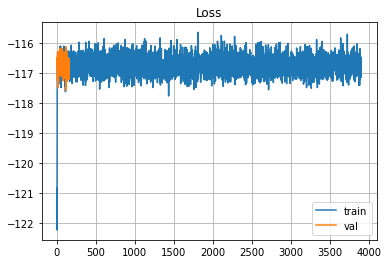

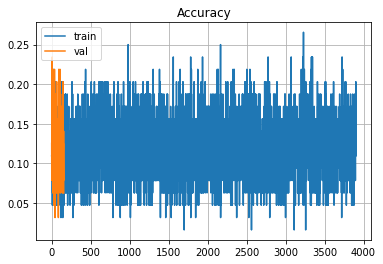

In [646]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.grid()
plt.show()
# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.grid()
plt.show()

# Evaluate model:

In [647]:
# make a prediction:
n = 0
X_test = x_test
prediction = model.predict(X_test[:,n:n+1])

print('prediction: ', prediction[0], " true label: ",y_test[n])


prediction:  9  true label:  7


In [648]:
X_test = x_test
Y_test = y_test_one_hot
test_acc, test_loss = model.evaluate(X_test, Y_test,batch_size = 100)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.09, Loss = -183.8056


C:\Python\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


## Report Question

As we increase the number of layers, the parameters will increase as well so the train error will be decreased and the test error will be increased because of overfitting cause of the increase in the learning parameters. So we should not build too many layers when we have a fully connected network. As it has a lot of weights cause of the full connection between the neurons, we can decrease the overfitting chance by using drop out and also CNN instead of FC networks to reduce the number of parameters and increase the generalization of the model. 